<a href="https://colab.research.google.com/github/SreeKumara/STML/blob/main/STML_ASSIGNMENT_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Question 1

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Features: Index(['YearsExperience'], dtype='object')
Target: Salary


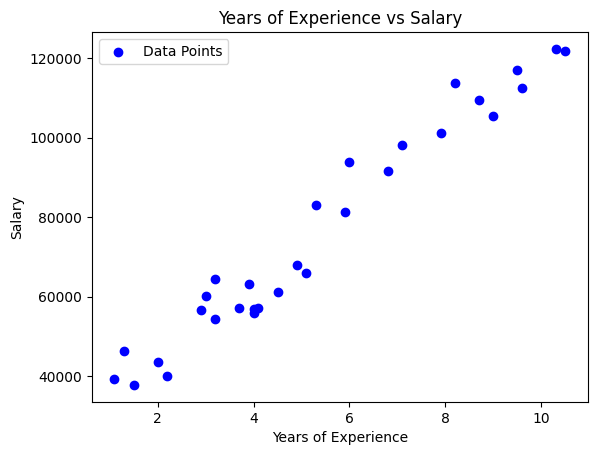

   YearsExperience_normalized
0                    0.000000
1                    0.021277
2                    0.042553
3                    0.095745
4                    0.117021
   Salary_normalized
0           0.019041
1           0.100094
2           0.000000
3           0.068438
4           0.025514


In [2]:
import pandas as pd

data = pd.read_csv('/content/Salary_Data.csv')
print(data.head())
X = data[['YearsExperience']]
y = data['Salary']
print("Features:", X.columns)
print("Target:", y.name)
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))
X_normalized_df = pd.DataFrame(X_normalized, columns=['YearsExperience_normalized'])
y_normalized_df = pd.DataFrame(y_normalized, columns=['Salary_normalized'])
print(X_normalized_df.head())
print(y_normalized_df.head())

In [ ]:
# Question 2

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

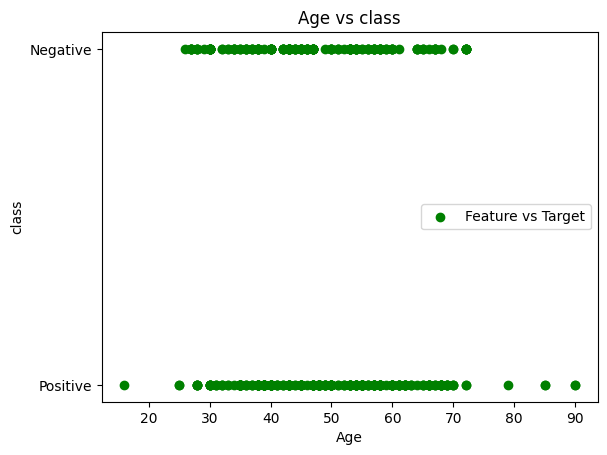

        Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0  0.324324     1.0       0.0         1.0                 0.0       1.0   
1  0.567568     1.0       0.0         0.0                 0.0       1.0   
2  0.337838     1.0       1.0         0.0                 0.0       1.0   
3  0.391892     1.0       0.0         0.0                 1.0       1.0   
4  0.594595     1.0       1.0         1.0                 1.0       1.0   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0         0.0             0.0              0.0      1.0           0.0   
1         0.0             0.0              1.0      0.0           0.0   
2         1.0             0.0              0.0      1.0           0.0   
3         1.0             1.0              0.0      1.0           0.0   
4         1.0             0.0              1.0      1.0           1.0   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  
0              1.0              0.0

In [7]:
import pandas as pd
data = pd.read_csv('/content/diabetes_data_upload.csv')
print(data.head())
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print("Features:", X.columns)
print("Target:", y.name)
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:, 0], y, color='green', label='Feature vs Target')
plt.title(f'{X.columns[0]} vs {y.name}')
plt.xlabel(X.columns[0])
plt.ylabel(y.name)
plt.legend()
plt.show()

# Convert string columns to numerical using LabelEncoder before scaling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])
# Convert target variable to numerical using LabelEncoder
y = label_encoder.fit_transform(y)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
# Reshape y to a 2D array before scaling
y_normalized = scaler.fit_transform(y.reshape(-1, 1))
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
# Use the original target name when creating the DataFrame
y_normalized_df = pd.DataFrame(y_normalized, columns=[data.iloc[:, -1].name])
print(X_normalized_df.head())
print(y_normalized_df.head())

# This part remains the same
X_encoded = pd.get_dummies(X, drop_first=True)
print(X_encoded.head())